<a href="https://colab.research.google.com/github/CarlosHdz360/Inteligencia_artificial2024/blob/main/P2_perceptronmulticapa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

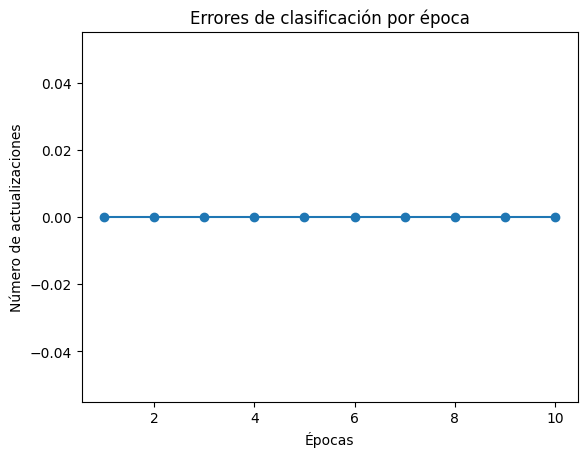

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
# dataset de la eficiencia de la enegia No.47
df = pd.read_csv('/content/ENB2012_data.csv')

# columnas X1 y X2 del dataset
X = df[['X1', 'X2']].values

# Y1 variable de salida
Y = df['Y1'].values

# Y1 en clase binaria
median_y = np.median(Y)
y_binary = np.where(Y > median_y, 1, -1)

# Entrena Perceptrón
perceptron_model = Perceptron(eta=0.1, n_iter=10)
perceptron_model.fit(X, y_binary)

# Visualización de errores durante las épocas
plt.plot(range(1, len(perceptron_model.errors_) + 1), perceptron_model.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Número de actualizaciones')
plt.title('Errores de clasificación por época')
plt.show()
